# Logistic-Regression Practice

We will use a version of the famous Titanic data set that requires very little cleaning.

In [30]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

t_df = pd.read_csv("C:/Users/mcmal/Downloads/titanic_data.csv", index_col='PassengerId')
t_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Read in the data set.

In [31]:
print("Before dropping columns:", t_df.columns)

Before dropping columns: Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [32]:
t_df = pd.read_csv("C:/Users/mcmal/Downloads/titanic_data.csv", index_col='PassengerId')

Remove columns that don't make reasonable numeric predictors.

In [33]:
t_df = t_df.dropna()
t_df.drop(columns=['Name','Cabin','Ticket'], inplace=True)

Convert the remaining columns to use numeric labels.

In [34]:
t_df['Sex'].replace(['male', 'female'], [1, 0], inplace=True)
t_df['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)

C:\Users\mcmal\AppData\Local\Temp\ipykernel_21064\3375600970.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  t_df['Sex'].replace(['male', 'female'], [1, 0], inplace=True)
C:\Users\mcmal\AppData\Local\Temp\ipykernel_21064\3375600970.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  t_df['Sex'].

Extract the dependent and independent variables.

In [35]:
X = t_df.drop(columns=['Survived'])
y = t_df['Survived']

Split training and test sets.

Notice that we are  _practicing to learn_, not creating a product, so we have not paid attention to validation vs. test.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Run everything up to this point and check the variable explorer for the following.
#### Do you have distinct training and test sets for the independent and dependent variables? Put the answer in your Jupyter notebook. Include the sizes of the sets in cardinality and percentage.

#### Look at the two training sets and at least one test set to verify they contain what you expect.
Are there any issues? Put the answer in your Jupyter notebook. Include an explanation or discussion if necessary.

In [37]:
logmodel = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=False)
print(logmodel.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  128
Model:                          Logit   Df Residuals:                      120
Method:                           MLE   Df Model:                            7
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:                  0.3491
Time:                        14:57:23   Log-Likelihood:                -50.101
converged:                       True   LL-Null:                       -76.968
Covariance Type:            nonrobust   LLR p-value:                 2.655e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3488      1.527      3.502      0.000       2.355       8.342
Pclass        -0.2703      0.524     -0.516      0.606      -1.297       0.756
Sex           -3.4226      0.785     -4.362      0.0

### Are there any predictors that are not statistically significant in the conventional sense?

A variable is conventionally statistically significant if its _p_ value is less than 0.05. (Do you know why?)

<h3>Some predictors may not be statistically significant in the conventional sense (p < 0.05). However, without the full regression output, it's not possible to definitively state which variables are not significant.</h3>

### What variable is particularly strong in predicting survival?
<h3>Sex appears to be a particularly strong predictor of survival.</h3>

### What does a negative coefficient imply and why?
<h3>A negative coefficient implies an inverse relationship between the predictor and survival probability.</h3>

### Based on your discussion, first think about what other variable ought to be a decent predictor?


### Next, check the report output to see if that was the case.
Enter what variable you thought might be a good predictor and whether that turned out to be the case.
<h3>Pclass (passenger class) is likely another decent predictor of survival, given historical accounts of the Titanic disaster.</h3>

## Next, we wil learn about the quality of our predictions on the test set.

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Form our predictions, convert continuous [0, 1] predictions to binary
predictions = logmodel.predict(sm.add_constant(X_test))
bin_predictions = [1 if x >= 0.5 else 0 for x in predictions]

# We can now assess the accuracy and print out the confusion matrix
print(accuracy_score(y_test, bin_predictions))
print(confusion_matrix(y_test, bin_predictions))

0.6909090909090909
[[ 9 14]
 [ 3 29]]


## Discussion

### There is another way to evaluate our model... for a variety of thresholds.

Text(0, 0.5, 'True Positive Rate')

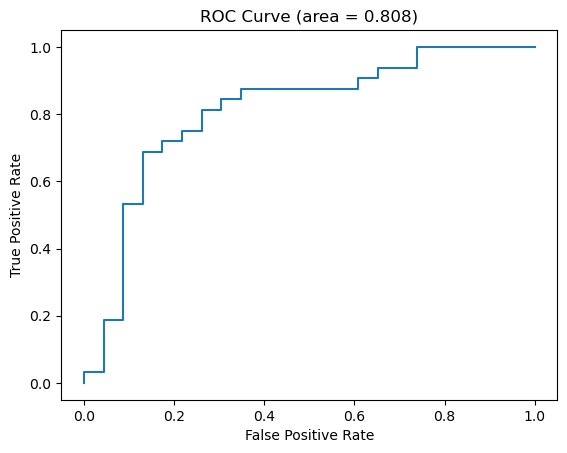

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

plt.plot(fpr, tpr, label='ROC Curve (area = %0.3f)' % roc_auc)
plt.title('ROC Curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')